# Multistep methods
# Second-Order Multistep Methods

## 1. Explicit Method: Adams-Bashforth (Order 2)

The **Adams-Bashforth method** is an explicit linear multistep method that uses past values of the derivative $f(t, y)$ to compute the next step.

### Formula:
$$
y_{n+1} = y_n + h \left( \frac{3}{2} f(t_n, y_n) - \frac{1}{2} f(t_{n-1}, y_{n-1}) \right)
$$

### Key Properties:
- **Explicit**: The method does not involve solving equations at each step.
- **Second-order accuracy**: The local truncation error is $O(h^3)$, so the global error is $O(h^2)$.
- **Two-step method**: It requires the values of $y_n$ and $y_{n-1}$.

### Application:
This method is suitable for **non-stiff problems** due to its lack of A-stability.

---

## 2. Implicit Method: Trapezoidal Rule (Order 2)

The **Trapezoidal Rule** is an implicit method that approximates the integral of $f(t, y)$ over a time step by averaging the derivative values at the endpoints of the step.

### Formula:
$$
y_{n+1} = y_n + \frac{h}{2} \left( f(t_n, y_n) + f(t_{n+1}, y_{n+1}) \right)
$$

### Key Properties:
- **Implicit**: Solving for $y_{n+1}$ requires solving a nonlinear equation, often done using iterative methods (e.g., Newton-Raphson).
- **Second-order accuracy**: The local truncation error is $O(h^3)$, and the global error is $O(h^2)$.
- **A-stable**: This makes it well-suited for **stiff problems**, including those arising in PDE discretizations.

### Application:
The trapezoidal rule is widely used in simulations of **stiff ODEs**, such as those from PDE discretizations, because of its stability and accuracy.

---

## Comparison:

| Feature                      | Adams-Bashforth (Explicit)         | Trapezoidal Rule (Implicit)         |
|------------------------------|------------------------------------|------------------------------------|
| **Order**                   | 2                                  | 2                                  |
| **Type**                    | Explicit                           | Implicit                           |
| **Stability**               | Not A-stable (conditionally stable)| A-stable                           |
| **Use Case**                | Non-stiff problems                 | Stiff problems                     |
| **Complexity**              | Easy to implement, low cost        | Requires solving nonlinear systems |

These two methods represent common second-order multistep approaches in their respective explicit and implicit categories.


# Concept of L-Stability and Backward Differentiation Formulas (BDF)

## L-Stability

L-stability is a property of numerical methods used for solving stiff ODEs. It is a stronger condition than A-stability.

### Definition:
A method is **L-stable** if:
1. It is A-stable, meaning it remains stable for any step size $h$ when applied to the test equation $y' = \lambda y$, where $\operatorname{Re}(\lambda) < 0$.
2. As $z = h\lambda \to -\infty$, the amplification factor $R(z) \to 0$.

Here, $R(z)$ is the stability function of the method, which determines how errors are amplified over successive steps.

### Key Implications:
- L-stability ensures that transient numerical errors are damped out rapidly for very stiff problems.
- This makes L-stable methods particularly effective for stiff ODEs and PDE discretizations where small step sizes are required for stability.

---

## Backward Differentiation Formulas (BDF)

The **Backward Differentiation Formulas (BDF)** are a family of implicit multistep methods used for solving ODEs, particularly stiff ones.

### General Formula:
$$
\sum_{j=0}^k \alpha_j y_{n-j} = h \beta f(t_n, y_n)
$$
where:
- $\alpha_j$ and $\beta$ are constants determined by the order of the method,
- $h$ is the time step size,
- $y_{n-j}$ are the solution values at previous steps.

### Stability of BDF Methods:
- **BDF1** (backward Euler) and **BDF2** (second-order) are A-stable.
- **BDF2** is also **L-stable**, making it highly effective for stiff problems.
- For $k > 2$, BDF methods lose A-stability but are still used in practice with slightly relaxed stability conditions.

---

## Example: BDF2 (Second-Order BDF Method)

The **BDF2 method** is an implicit, second-order accurate method that is both A-stable and L-stable. The formula is:
$$
y_{n+1} = \frac{4}{3} y_n - \frac{1}{3} y_{n-1} + \frac{2h}{3} f(t_{n+1}, y_{n+1})
$$

### Key Features:
- **Implicit**: Solving $y_{n+1}$ requires solving a nonlinear equation at each step, often using iterative methods like Newton-Raphson.
- **Second-order accuracy**: The local truncation error is $O(h^3)$, and the global error is $O(h^2)$.
- **L-stability**: This ensures that transient errors decay rapidly, making it suitable for very stiff problems.

### Applications:
- BDF2 is widely used for stiff systems of ODEs, particularly those arising from PDE discretizations.
- Its L-stability makes it a reliable choice for solving problems with stiff source terms or parabolic PDEs.

---

## Summary Table

| Feature                 | BDF1 (Backward Euler)       | BDF2                        | Higher-Order BDF ($k > 2$)  |
|-------------------------|-----------------------------|-----------------------------|-----------------------------|
| **Order**              | 1                           | 2                           | $k$                        |
| **Stability**          | A-stable                   | A-stable, L-stable          | Not A-stable               |
| **Use Case**           | Stiff problems             | Stiff problems, higher accuracy | Moderate stiffness problems |
| **Complexity**         | Solving implicit equations | Solving implicit equations  | Solving implicit equations |


$$\frac{3y_2 - 4y_1+1y_0}{2h}$$

$$
3(y + hy' + \frac12 h^2y'') - 4y + (y - hy' + \frac12 h^2y'')) = 
0y +2hy' + 2 hy''
$$
??

$$Y = (1-2/3Kh)^{-1} (4/3y_1 -1/3y_0) $$

$$ Y= ay_1 + by_2$$
y^2-ay-b = 0

D = a^2 +4b =(16/9 - 1/9)/... = 5/3 * (1-2Kh/3)^{-1}
D > 0 iff 1> 2Kh/3 !!

p/q = ln(y_+/-)

c*exp(pi)(exp(2p) - aexp(p) -b)
+d*exp(qi)(exp(2q) - aexp(q) -b)



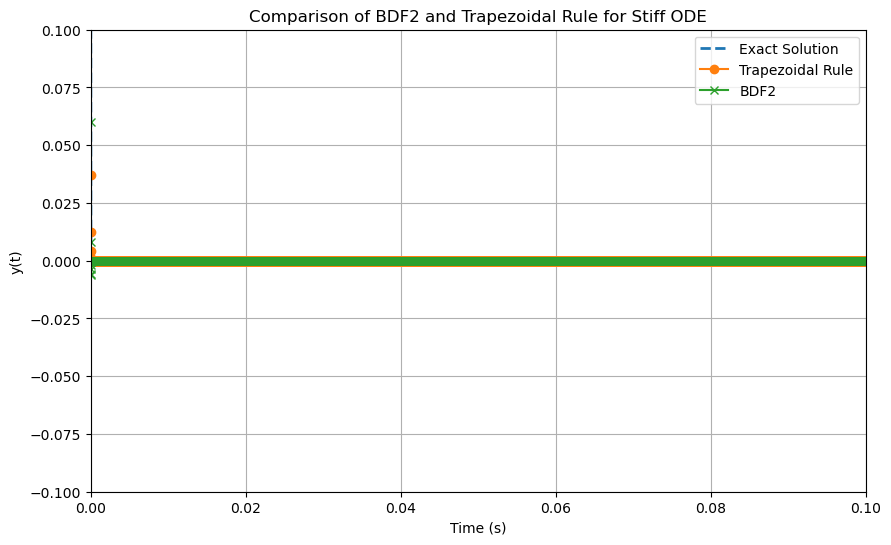

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the stiff ODE
k1 = 1e6  # Large reaction rate constant
k2 = 1e2  # Smaller reaction rate constant
y0 = 1.0  # Initial condition
t_final = 0.1  # Final time


# Define the ODE
def stiff_ode(t, y):
    return -k1 * y  # Simplified single equation

# Analytical solution for comparison
def analytical_solution(t):
    return y0 * np.exp(-k1 * t)

# Time array
times = np.arange(0, t_final + dt, dt)

# Trapezoidal Rule Implementation
# Y -h/2 f(Y) = y +h/2f(y)
# Y + h/2 k Y = y - h/2 k y
# Y = y(1-kh/2)/ (1+kh/2))
# (1 -z/2) / (1 +z/2) < 1
# |2-z| < |-2-z|; boundary vertical 
def trapezoidal_rule(f, y0, times, dt):
    y = np.zeros(len(times))
    y[0] = y0
    for i in range(1, len(times)):
        t = times[i - 1]
        t_next = times[i]
        #y_next = y[i - 1] + dt * f(t, y[i - 1])  # Explicit Euler guess
        # Implicit trapezoidal iteration (solve y_next = equation)
        y[i] =  y[i - 1] * (1 - k1 * dt / 2) / (1 + k1 * dt / 2)
    return y

# BDF2 Implementation
def bdf2(f, y0, times, dt):
    y = np.zeros(len(times))
    y[0] = y0
    if len(times) > 1:  # Bootstrap using backward Euler for the first step
        y[1] = y[0] / (1 + dt * k1)  # First step via backward Euler
    for i in range(2, len(times)):
        # Solve BDF2 equation: y[i+1] = (4/3)*y[i] - (1/3)*y[i-1] + (2/3)*dt*f(t[i+1], y[i+1])
        t_next = times[i]
        y[i] = (4 / 3) * y[i - 1] - (1 / 3) * y[i - 2]
        y[i] = y[i] / (1 + (2 / 3) * dt * k1)
    return y

# Solve using both methods
dt = 1e-6  # Time step
y_trap = trapezoidal_rule(stiff_ode, y0, times, dt)
y_bdf2 = bdf2(stiff_ode, y0, times, dt)
y_exact = analytical_solution(times)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times, y_exact, label="Exact Solution", linestyle="--", linewidth=2)
plt.plot(times, y_trap, label="Trapezoidal Rule", marker="o")
plt.plot(times, y_bdf2, label="BDF2", marker="x")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.xlim(0, 0.1)
plt.ylim(-0.1, 0.1) 
plt.title("Comparison of BDF2 and Trapezoidal Rule for Stiff ODE")
plt.legend()
plt.grid(True)
plt.show()



## First Dahlquist barrier
Stable linear q-step multistep method cannot attain an order of convergence greater than q + 1 if q is odd and greater than q + 2 if q is even. 

If the method is also explicit, then it cannot attain an order greater than q (Hairer, Nørsett & Wanner 1993, Thm III.3.5).

## Second Dahlquist barrier
There is no explicit linear multistep method that is A-stable. 

Further, the maximal order of an (implicit) A-stable linear multistep method is 2. Among the A-stable linear multistep methods of order 2, the trapezoidal rule has the smallest error constant (Dahlquist 1963, Thm 2.1 and 2.2).

# Collocation methods
$$
 \newcommand{d}{\,{\rm d}}
 \def\vc#1{\mathbf{\boldsymbol{#1}}}     % vector
 \def\tn#1{{\mathbb{#1}}}
 \def\Real{{\rm\bf R}}
 \def\prtl{\partial}
$$


Collocation methods are based on following steps:
1. Choose the interval $(0, T)$ to solve at single step.
2. Select a space of differentiable functions on $(0,T)$ of finite dimension $d$.
   For example polynomials or splines of certain order. Use space of vector
   functions in case of ODE systems.
3. Choose particular basis of the space. Solution can be written in form:
   $$
   \vc y(t) = \sum_{i=1}^{d} y_i \phi_i(t)
   $$    
5. Apply $N$ boundary or initial conditions.
6. Select $d - N$ collocation points, apply ODE in these points.
7. Solve system of $d$ (nonlinear) equations for $d$ unknowns $y_i$.

### Problem Setup

Suppose we have the following ODE:

$$ y''(x) + y(x) = x, \quad 0 < x < 1 $$

with boundary conditions:

$$ y(0) = 0, \quad y(1) = 0 $$

This is a linear second-order ODE with boundary conditions at both ends of the interval.

### Collocation Method

1. **Approximation**: Assume an approximate solution, $y(x)$, in the form of a polynomial. For simplicity, let's choose a cubic polynomial:

   $$ y(x) = a + bx + cx^2 + dx^3 $$

   Here, $a, b, c,$ and $d$ are coefficients to be determined.

2. **Boundary Conditions**: Apply the boundary conditions to reduce the number of unknown coefficients:

   - $y(0) = a = 0$
   - $y(1) = a + b + c + d = 0$

   So, our polynomial simplifies to:

   $$ y(x) = bx + cx^2 + dx^3 $$
   $$ y(x) = 0 + bx + cx^2 + dx^3 $$

   We now have three unknowns (b, c, d) and need two more equations (since one equation comes from the boundary condition at x=1).

3. **Collocation Points**: Choose collocation points within the interval. Let's pick two points, $x_1 = \frac{1}{3}$ and $x_2 = \frac{2}{3}$.

4. **Formulate Equations**: At each collocation point, the ODE must be satisfied. Substitute $x_1$ and $x_2$ into the differential equation:

   - At $x = x_1$:

     $$ y''\left(\frac{1}{3}\right) + y\left(\frac{1}{3}\right) = \frac{1}{3} $$

   - At $x = x_2$:

     $$ y''\left(\frac{2}{3}\right) + y\left(\frac{2}{3}\right) = \frac{2}{3} $$

5. **Solve the System of Equations**: This will yield a system of equations in terms of $b, c,$ and $d$. Solve this system to find the coefficients.

### Conclusion

The solution to this system of equations will give the values of $b, c,$ and $d$, thus providing the approximate solution $y(x)$ over the interval. This example is relatively straightforward, but the collocation method can be extended to more complex problems, including nonlinear ODEs and higher-order polynomials for the approximate solution. The choice of collocation points and the form of the approximate solution can significantly impact the accuracy of the method.


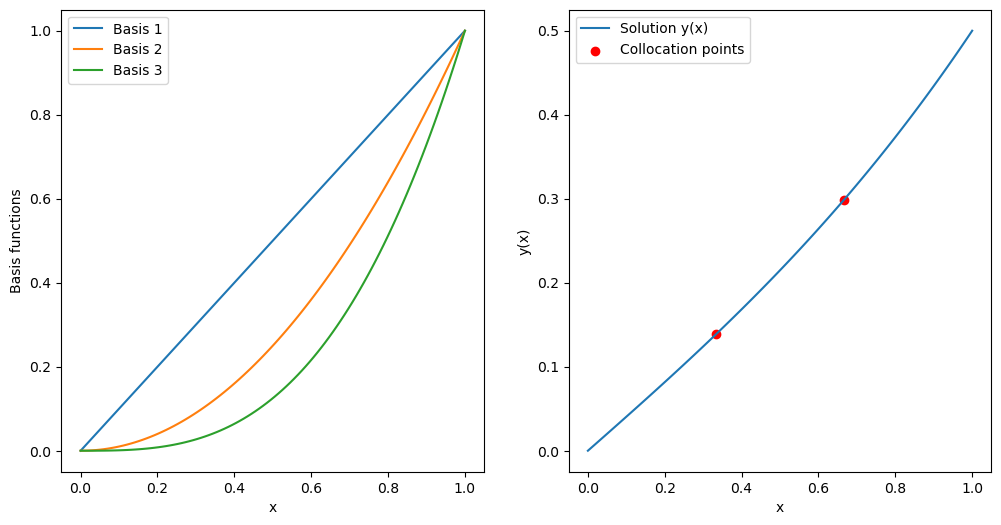

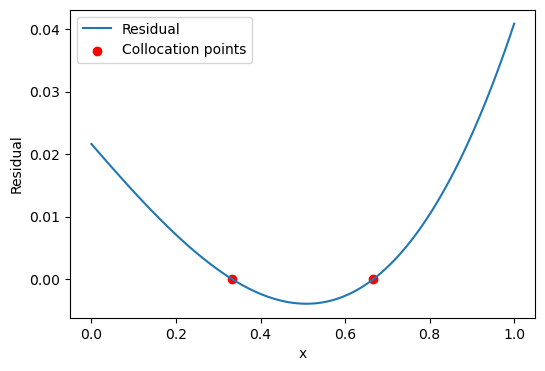

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the basis functions (cubic polynomial)
def basis_functions(x):
    return np.array([x, x**2, x**3])

# Define the derivative functions
def y_prime(x, b, c, d):
    return b + 2*c*x + 3*d*x**2

def y_double_prime(x, b, c, d):
    return 2*c + 6*d*x

# Boundary conditions
y0, y1 = 0, 0.5

# Collocation points
x1, x2 = 1/3, 2/3

# System of equations to find coefficients b, c, d
def equations(vars):
    b, c, d = vars
    y = lambda x: b*x + c*x**2 + d*x**3
    return (y_double_prime(x1, b, c, d) + y(x1) - x1, 
            y_double_prime(x2, b, c, d) + y(x2) - x2, 
            b + c + d - y1)

# Solve for coefficients
b, c, d = fsolve(equations, (0, 0, 0))

# Define the solution function
def y(x):
    return b*x + c*x**2 + d*x**3

# Define the residual function
def residual(x):
    return y_double_prime(x, b, c, d) + y(x) - x

# X values for plotting
x_values = np.linspace(0, 1, 100)

# Plot basis functions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, func in enumerate(basis_functions(x_values), 1):
    plt.plot(x_values, func, label=f'Basis {i}')
plt.xlabel('x')
plt.ylabel('Basis functions')
plt.legend()

# Plot the solution and collocation points
plt.subplot(1, 2, 2)
plt.plot(x_values, y(x_values), label='Solution y(x)')
plt.scatter([x1, x2], [y(x1), y(x2)], color='red', label='Collocation points')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

plt.show()

# Plot the residual
plt.figure(figsize=(6, 4))
plt.plot(x_values, [residual(x) for x in x_values], label='Residual')
plt.scatter([x1, x2], [residual(x1), residual(x2)], color='red', label='Collocation points')
plt.xlabel('x')
plt.ylabel('Residual')
plt.legend()
plt.show()


# Differencial - algebraic equations